In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn import metrics

In [2]:
# load txt file
names = pd.read_csv('data/kddcup.names.txt', header=None, delimiter=':',skiprows=1)

# make column 0 into a list
name_list = names[0].tolist()

# add the last column with type
name_list.append('type')

In [3]:
# use the column names
netattacks = pd.read_csv('data/kddcup.data_10_percent.gz', names=name_list, header=None, index_col=None)

# netattacks.head()
# netattacks.describe(include='all')

In [4]:
netattacks['label'] = np.where(netattacks['type'] == 'normal.', 'good', 'bad')
# netattacks['label'].value_counts()

In [5]:
train, test = train_test_split(netattacks, test_size=0.25)
print("Rows in train:", len(train))
print("Rows in test:", len(test))

Rows in train: 370515
Rows in test: 123506


In [6]:
# define new tree
dt = tree.DecisionTreeClassifier()
# train the model using a list of column names
pred_vars = ['duration', 'src_bytes', 'dst_bytes']
# The value we are trying to predict is 'label'
dt.fit(train.loc[:, pred_vars], train['label'])
# tree.plot_tree(dt)

DecisionTreeClassifier()

In [7]:
predicted = dt.predict(test.loc[:, pred_vars])
print(predicted[:5]) # show first five predictions

['bad' 'bad' 'bad' 'bad' 'bad']


In [8]:
from collections import Counter
# count test data
test_labels_stats = Counter(test['label'])
print("Labels in the test data:", test_labels_stats)

# count predicted
predicted_labels_stats = Counter(predicted)
print("Labels in the predictions:", predicted_labels_stats)

Labels in the test data: Counter({'bad': 99028, 'good': 24478})
Labels in the predictions: Counter({'bad': 100403, 'good': 23103})


In [9]:
metrics.confusion_matrix(y_true=test['label'], y_pred=predicted, labels=['good', 'bad'])

array([[23092,  1386],
       [   11, 99017]], dtype=int64)

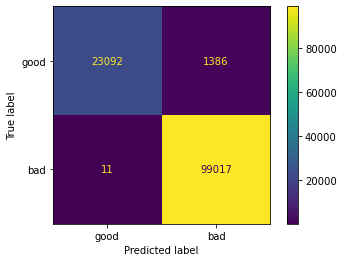

In [10]:
metrics.plot_confusion_matrix(dt, test.loc[:, pred_vars], test['label'], labels=['good', 'bad'])
plt.show()

In [11]:
# compute baseline accuracy (predict all bad)
baseline = test_labels_stats['bad'] / (test_labels_stats['good'] + test_labels_stats['bad'])
print("Baseline accuracy is:", baseline)

# compute the observed accuracy
acc = metrics.accuracy_score(test['label'], predicted)
print("Observed accuracy is:", acc)

Baseline accuracy is: 0.8018071996502194
Observed accuracy is: 0.9886888086408757


In [12]:
result = metrics.classification_report(test['label'], predicted, digits=4)
print(result)

              precision    recall  f1-score   support

         bad     0.9862    0.9999    0.9930     99028
        good     0.9995    0.9434    0.9706     24478

    accuracy                         0.9887    123506
   macro avg     0.9929    0.9716    0.9818    123506
weighted avg     0.9888    0.9887    0.9886    123506



# Exercises

    Try with different predictor variables. Does the model improve?
    Try with different parameters for the tree. The list of adjustable parameters is here
    (Optional): Try running the models with the full dataset.

# Task 1
3 models a base, a improvement one, and changing parameters.

In [13]:
# define new tree
dt_2 = tree.DecisionTreeClassifier()
# train the model using a list of column names
pred_vars_2 = ['count', 'num_root']
# The value we are trying to predict is 'label'
dt_2.fit(train.loc[:, pred_vars_2], train['label'])
# tree.plot_tree(dt)

DecisionTreeClassifier()

In [14]:
train, test = train_test_split(netattacks, test_size=0.25)
print("Rows in train:", len(train))
print("Rows in test:", len(test))

Rows in train: 370515
Rows in test: 123506


In [15]:
predicted_2 = dt_2.predict(test.loc[:, pred_vars_2])
print(predicted_2[:5]) # show first five predictions

['bad' 'bad' 'bad' 'good' 'bad']


In [16]:
from collections import Counter
# count test data
test_labels_stats_2 = Counter(test['label'])
print("Labels in the test data:", test_labels_stats_2)

# count predicted
predicted_labels_stats_2 = Counter(predicted_2)
print("Labels in the predictions:", predicted_labels_stats_2)

Labels in the test data: Counter({'bad': 99223, 'good': 24283})
Labels in the predictions: Counter({'bad': 97446, 'good': 26060})


In [17]:
metrics.confusion_matrix(y_true=test['label'], y_pred=predicted_2, labels=['good', 'bad'])

array([[23954,   329],
       [ 2106, 97117]], dtype=int64)

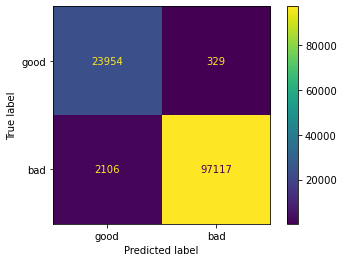

In [18]:
metrics.plot_confusion_matrix(dt_2, test.loc[:, pred_vars_2], test['label'], labels=['good', 'bad'])
plt.show()

In [19]:
# compute baseline accuracy (predict all bad)
baseline = test_labels_stats_2['bad'] / (test_labels_stats_2['good'] + test_labels_stats_2['bad'])
print("Baseline accuracy is:", baseline)

# compute the observed accuracy
acc = metrics.accuracy_score(test['label'], predicted_2)
print("Observed accuracy is:", acc)

Baseline accuracy is: 0.8033860703123735
Observed accuracy is: 0.9802843586546403


In [20]:
result = metrics.classification_report(test['label'], predicted_2, digits=4)
print(result)

              precision    recall  f1-score   support

         bad     0.9966    0.9788    0.9876     99223
        good     0.9192    0.9865    0.9516     24283

    accuracy                         0.9803    123506
   macro avg     0.9579    0.9826    0.9696    123506
weighted avg     0.9814    0.9803    0.9805    123506



### Improvement

In [22]:
#for loop to add one to see if I can beat 98.9
var_list = ['wrong_fragment','urgent','hot', 'num_failed_logins', 'num_compromised', 
            'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
           'serror_rate', 'rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_count',
           'srv_serror_rate', 'srv_rerror_rate', 'srv_diff_host_rate']

from collections import Counter

for i in var_list:
    dt_loop = tree.DecisionTreeClassifier()
    pred_vars_loop = ['count', 'num_root', i]
    dt_loop.fit(train.loc[:, pred_vars_loop], train['label'])
    train, test = train_test_split(netattacks, test_size=0.25)
    predicted_loop = dt_loop.predict(test.loc[:, pred_vars_loop])
    test_labels_stats_loop = Counter(test['label'])
    predicted_labels_stats_loop = Counter(predicted_loop)
    acc = metrics.accuracy_score(test['label'], predicted_loop)
    if acc > .9803:
        print(pred_vars_loop, ' Greater than first run: ', acc)
        
    if acc > .989:
        print(pred_vars_loop, ' Greater than professor run!')
    

['count', 'num_root', 'wrong_fragment']  Greater than first run:  0.9811588100982949
['count', 'num_root', 'hot']  Greater than first run:  0.9850938415947403
['count', 'num_root', 'num_compromised']  Greater than first run:  0.9838226482923906
['count', 'num_root', 'serror_rate']  Greater than first run:  0.9838793257007756
['count', 'num_root', 'rerror_rate']  Greater than first run:  0.9808835198289961
['count', 'num_root', 'same_srv_rate']  Greater than first run:  0.9841222288795686
['count', 'num_root', 'diff_srv_rate']  Greater than first run:  0.9840088740627986
['count', 'num_root', 'srv_count']  Greater than first run:  0.9853367447735333
['count', 'num_root', 'srv_serror_rate']  Greater than first run:  0.9846566158729131
['count', 'num_root', 'srv_rerror_rate']  Greater than first run:  0.9808187456479848
['count', 'num_root', 'srv_diff_host_rate']  Greater than first run:  0.9809644875552604


In [23]:
var_list = ['wrong_fragment','urgent','hot', 'num_failed_logins', 'num_compromised', 
            'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
           'serror_rate', 'rerror_rate', 'same_srv_rate', 'diff_srv_rate',
           'srv_serror_rate', 'srv_rerror_rate', 'srv_diff_host_rate']

for i in var_list:
    dt_loop = tree.DecisionTreeClassifier()
    pred_vars_loop = ['count', 'num_root', 'srv_count', i]
    dt_loop.fit(train.loc[:, pred_vars_loop], train['label'])
    train, test = train_test_split(netattacks, test_size=0.25)
    predicted_loop = dt_loop.predict(test.loc[:, pred_vars_loop])
    test_labels_stats_loop = Counter(test['label'])
    predicted_labels_stats_loop = Counter(predicted_loop)
    acc = metrics.accuracy_score(test['label'], predicted_loop)
    if acc > .9803:
        print(pred_vars_loop, ' Greater than first run: ', acc)
        
    if acc > .989:
        print(pred_vars_loop, ' Greater than professor run!')

['count', 'num_root', 'srv_count', 'wrong_fragment']  Greater than first run:  0.9871504218418539
['count', 'num_root', 'srv_count', 'urgent']  Greater than first run:  0.9856363253607112
['count', 'num_root', 'srv_count', 'hot']  Greater than first run:  0.9905591631175813
['count', 'num_root', 'srv_count', 'hot']  Greater than professor run!
['count', 'num_root', 'srv_count', 'num_failed_logins']  Greater than first run:  0.985425809272424
['count', 'num_root', 'srv_count', 'num_compromised']  Greater than first run:  0.9899761954884783
['count', 'num_root', 'srv_count', 'num_compromised']  Greater than professor run!
['count', 'num_root', 'srv_count', 'num_file_creations']  Greater than first run:  0.985782067267987
['count', 'num_root', 'srv_count', 'num_shells']  Greater than first run:  0.9855310673165676
['count', 'num_root', 'srv_count', 'num_access_files']  Greater than first run:  0.985199099638884
['count', 'num_root', 'srv_count', 'num_outbound_cmds']  Greater than first ru

0.9908587437047592


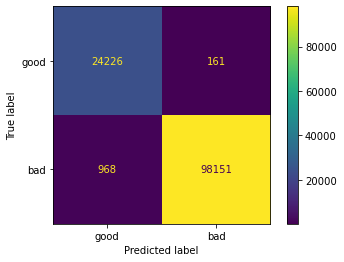

In [27]:
dt_loop = tree.DecisionTreeClassifier()
pred_vars_loop = ['count', 'num_root', 'srv_count', 'hot']
dt_loop.fit(train.loc[:, pred_vars_loop], train['label'])
train, test = train_test_split(netattacks, test_size=0.25)
predicted_loop = dt_loop.predict(test.loc[:, pred_vars_loop])
test_labels_stats_loop = Counter(test['label'])
metrics.plot_confusion_matrix(dt_loop, test.loc[:, pred_vars_loop], test['label'], labels=['good', 'bad'])
predicted_labels_stats_loop = Counter(predicted_loop)
acc = metrics.accuracy_score(test['label'], predicted_loop)
print(acc)
plt.show()

# Task 2

0.9906482276164721


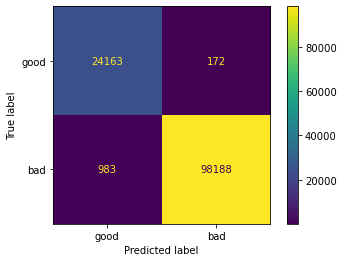

In [35]:
dt_loop = tree.DecisionTreeClassifier(criterion='entropy', max_features='sqrt')
pred_vars_loop = ['count', 'num_root', 'srv_count', 'hot']
dt_loop.fit(train.loc[:, pred_vars_loop], train['label'])
train, test = train_test_split(netattacks, test_size=0.25)
predicted_loop = dt_loop.predict(test.loc[:, pred_vars_loop])
test_labels_stats_loop = Counter(test['label'])
metrics.plot_confusion_matrix(dt_loop, test.loc[:, pred_vars_loop], test['label'], labels=['good', 'bad'])
predicted_labels_stats_loop = Counter(predicted_loop)
acc = metrics.accuracy_score(test['label'], predicted_loop)
print(acc)
plt.show()

# Optional Model on full Dataset

In [39]:
# use the column names
netattacksfull = pd.read_csv('data/kddcup.data.gz', names=name_list, header=None, index_col=None)
netattacksfull['label'] = np.where(netattacksfull['type'] == 'normal.', 'good', 'bad')

0.993478729519977


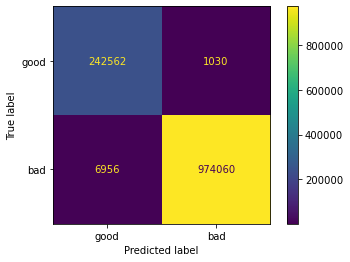

In [41]:
dt_loop = tree.DecisionTreeClassifier(criterion='entropy', max_features='sqrt')
pred_vars_loop = ['count', 'num_root', 'srv_count', 'hot']
train, test = train_test_split(netattacksfull, test_size=0.25)
dt_loop.fit(train.loc[:, pred_vars_loop], train['label'])
predicted_loop = dt_loop.predict(test.loc[:, pred_vars_loop])
test_labels_stats_loop = Counter(test['label'])
metrics.plot_confusion_matrix(dt_loop, test.loc[:, pred_vars_loop], test['label'], labels=['good', 'bad'])
predicted_labels_stats_loop = Counter(predicted_loop)
acc = metrics.accuracy_score(test['label'], predicted_loop)
print(acc)
plt.show()